In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Dataset (New Stable Link)
# This link comes from an IBM Machine Learning course and is very stable.
data = pd.read_csv("/content/FuelConsumptionCo2.csv")

# 2. Clean up column names (Make them easier to type)
data.rename(columns={
    'MODELYEAR': 'Year',
    'MAKE': 'Make',
    'MODEL': 'Model',
    'VEHICLECLASS': 'Class',
    'ENGINESIZE': 'Engine_Size',
    'CYLINDERS': 'Cylinders',
    'TRANSMISSION': 'Transmission',
    'FUELTYPE': 'Fuel_Type',
    'FUELCONSUMPTION_CITY': 'City_Cons',
    'FUELCONSUMPTION_HWY': 'Hwy_Cons',
    'FUELCONSUMPTION_COMB': 'Comb_Cons',
    'FUELCONSUMPTION_COMB_MPG': 'Mpg_Cons',
    'CO2EMISSIONS': 'CO2_Emissions'
}, inplace=True)

# 3. Show the Data
print(f"Dataset Shape: {data.shape}")
print("--- First 5 Rows ---")
print(data.head())

print("\n--- Data Types ---")
print(data.dtypes)

Dataset Shape: (1067, 13)
--- First 5 Rows ---
   Year   Make       Model        Class  Engine_Size  Cylinders Transmission  \
0  2014  ACURA         ILX      COMPACT          2.0          4          AS5   
1  2014  ACURA         ILX      COMPACT          2.4          4           M6   
2  2014  ACURA  ILX HYBRID      COMPACT          1.5          4          AV7   
3  2014  ACURA     MDX 4WD  SUV - SMALL          3.5          6          AS6   
4  2014  ACURA     RDX AWD  SUV - SMALL          3.5          6          AS6   

  Fuel_Type  City_Cons  Hwy_Cons  Comb_Cons  Mpg_Cons  CO2_Emissions  
0         Z        9.9       6.7        8.5        33            196  
1         Z       11.2       7.7        9.6        29            221  
2         Z        6.0       5.8        5.9        48            136  
3         Z       12.7       9.1       11.1        25            255  
4         Z       12.1       8.7       10.6        27            244  

--- Data Types ---
Year               int64
M

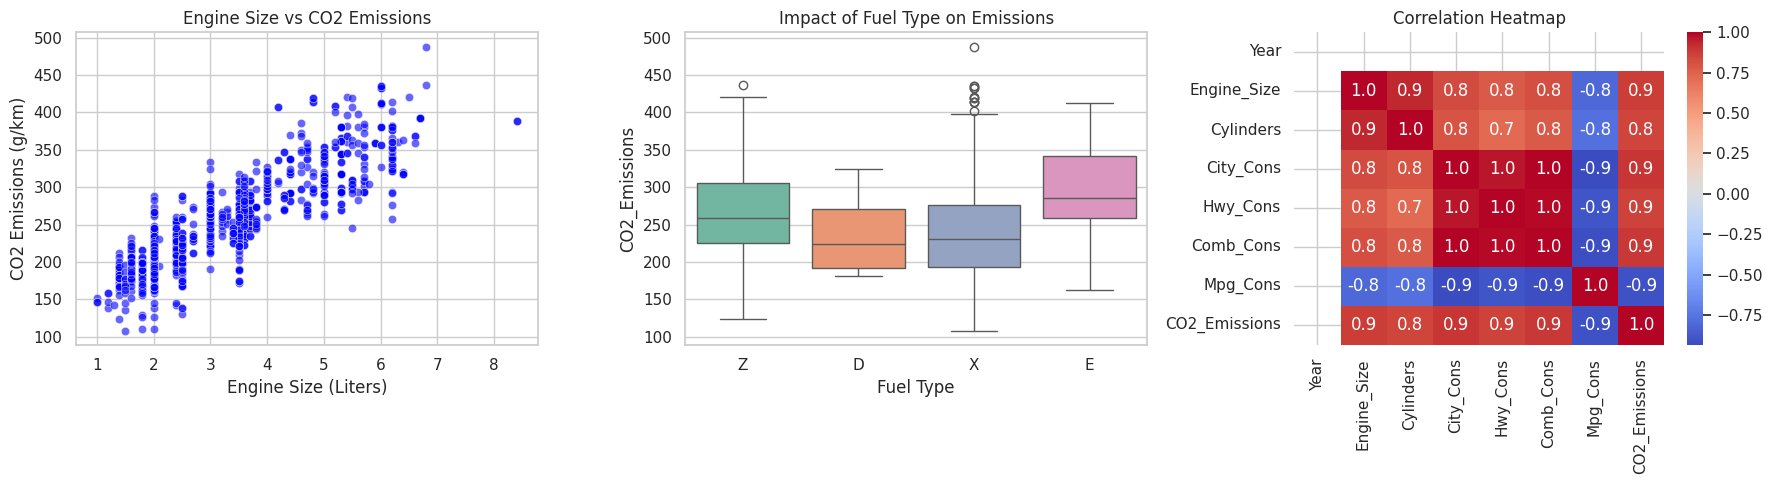

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Create a figure with 3 subplots
plt.figure(figsize=(18, 5))

# Chart 1: Scatter Plot (Engine Size vs CO2 Emissions)
plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='Engine_Size', y='CO2_Emissions', color='blue', alpha=0.6)
plt.title('Engine Size vs CO2 Emissions')
plt.xlabel('Engine Size (Liters)')
plt.ylabel('CO2 Emissions (g/km)')

# Chart 2: Box Plot (Fuel Type vs CO2 Emissions)
# Fuel Types: Z=Premium Gas, X=Regular Gas, D=Diesel, E=Ethanol
plt.subplot(1, 3, 2)
sns.boxplot(data=data, x='Fuel_Type', y='CO2_Emissions',hue='Fuel_Type', palette='Set2', legend=False)
plt.title('Impact of Fuel Type on Emissions')
plt.xlabel('Fuel Type')

# Chart 3: Correlation Heatmap (Numerical variables only)
plt.subplot(1, 3, 3)
# Select only numerical columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Select the Features we want to use
# We choose the ones with the highest correlation seen in your heatmap
features = ['Engine_Size', 'Cylinders', 'Comb_Cons', 'Fuel_Type']
target = 'CO2_Emissions'

# Create a new clean dataframe with just these columns
df_clean = data[features + [target]].copy()

# 2. Convert Categorical Data to Numbers (One-Hot Encoding)
# This turns 'Fuel_Type' (X, Z, D, E) into columns like 'Fuel_Type_X', 'Fuel_Type_Z'
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# 3. Separate Inputs (X) and Output (y)
X = df_encoded.drop(target, axis=1)
y = df_encoded[target]

# 4. Split into Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Standardize the Data (Scale it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("--- Data Processing Complete ---")
print(f"Original Features: {features}")
print(f"New Encoded Feature Count: {X_train.shape[1]}")
print(f"Training Data Shape: {X_train_scaled.shape}")
print("\n--- Example of Scaled Data (First Row) ---")
print(X_train_scaled[0])

--- Data Processing Complete ---
Original Features: ['Engine_Size', 'Cylinders', 'Comb_Cons', 'Fuel_Type']
New Encoded Feature Count: 6
Training Data Shape: (853, 6)

--- Example of Scaled Data (First Row) ---
[-1.38536397 -0.99621998 -1.10334259 -0.30821029  1.04681569 -0.83416129]


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# 1. Initialize the 3 Models
model_linear = LinearRegression()
model_tree = DecisionTreeRegressor(random_state=42)
model_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Train (Fit) them all
model_linear.fit(X_train_scaled, y_train)
model_tree.fit(X_train_scaled, y_train)
model_forest.fit(X_train_scaled, y_train)

# 3. Make Predictions on Test Data
pred_linear = model_linear.predict(X_test_scaled)
pred_tree = model_tree.predict(X_test_scaled)
pred_forest = model_forest.predict(X_test_scaled)

# 4. Evaluate (Calculate Loss & Score)
# Loss (MSE): Lower is better
loss_linear = mean_squared_error(y_test, pred_linear)
loss_tree = mean_squared_error(y_test, pred_tree)
loss_forest = mean_squared_error(y_test, pred_forest)

# Score (R2): Higher is better (1.0 is max)
score_linear = r2_score(y_test, pred_linear)
score_tree = r2_score(y_test, pred_tree)
score_forest = r2_score(y_test, pred_forest)

print("--- 📊 Model Competition Results ---")
print(f"1. Linear Regression | Loss: {loss_linear:.2f} | R2 Score: {score_linear:.4f}")
print(f"2. Decision Tree     | Loss: {loss_tree:.2f} | R2 Score: {score_tree:.4f}")
print(f"3. Random Forest     | Loss: {loss_forest:.2f} | R2 Score: {score_forest:.4f}")

# 5. Determine the Winner (Lowest Loss)
best_loss = min(loss_linear, loss_tree, loss_forest)

if loss_forest == best_loss:
    print("\n🏆 WINNER: Random Forest!")
    best_model = model_forest
elif loss_tree == best_loss:
    print("\n🏆 WINNER: Decision Tree!")
    best_model = model_tree
else:
    print("\n🏆 WINNER: Linear Regression!")
    best_model = model_linear

# 6. Save the Best Model and Scaler (Critical for API)
joblib.dump(best_model, 'my_best_co2_model.pkl')
joblib.dump(scaler, 'my_scaler.pkl')

# Save column names to ensure API inputs match training
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')

print("✅ Best Model, Scaler, and Columns have been saved successfully.")

--- 📊 Model Competition Results ---
1. Linear Regression | Loss: 49.19 | R2 Score: 0.9881
2. Decision Tree     | Loss: 26.47 | R2 Score: 0.9936
3. Random Forest     | Loss: 37.86 | R2 Score: 0.9908

🏆 WINNER: Decision Tree!
✅ Best Model, Scaler, and Columns have been saved successfully.


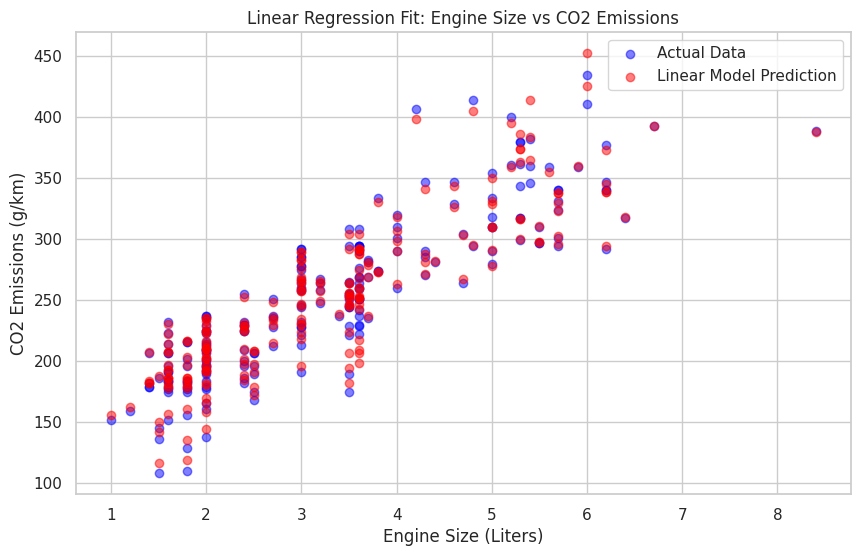

In [18]:
# We need to visualize how the Linear Regression model "sees" the data
# We'll pick 'Engine_Size' because it had the highest correlation (0.9)

plt.figure(figsize=(10, 6))

# 1. Plot the Real Data (Blue Dots)
# We use the original X_test data (before scaling) just for plotting so the x-axis makes sense
plt.scatter(X_test['Engine_Size'], y_test, color='blue', alpha=0.5, label='Actual Data')

# 2. Plot the Linear Regression Prediction (Red Line)
# We use the linear model we trained in the previous cell
plt.scatter(X_test['Engine_Size'], pred_linear, color='red', alpha=0.5, label='Linear Model Prediction')

plt.title('Linear Regression Fit: Engine Size vs CO2 Emissions')
plt.xlabel('Engine Size (Liters)')
plt.ylabel('CO2 Emissions (g/km)')
plt.legend()
plt.show()